# Average hdf5 images

<span style="color:red">IMPORTANT</span> - This notebook reads HDF5 files. Always PAUSE Sequencer.vi to run analysis for current sequence (HDF5 r/w conflict)!

### Configure IPython

In [1]:
#import python packages
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import oskar

### Import, average and backsub.

#### data

In [2]:
rid = '20151216_115732'
h5 = oskar.H5Data(rid)              # data
h5.load_log()
out_dire = h5.out_dire("Images")    # output
h5.pprint()

20151216_115732
   Author:	 AD
   Description:  Trap beam alignment to MCP.
		 -200, 800, 1400


In [3]:
squid = 1
img, info = h5.load_array(squid, name='IMG')
av_img = np.rot90(np.mean(img, axis=2), k=-1)
print(info)
print(np.shape(img))

{u'AmplifierOn': 1, u'Binning': 4, u'Exposure': 1.0}
(404L, 304L, 12L)


#### background data

In [4]:
rid_bk = rid #'20151216_115732'
h5_bk = oskar.H5Data(rid_bk)              # data
h5_bk.load_log()
h5_bk.pprint()

20151216_115732
   Author:	 AD
   Description:  Trap beam alignment to MCP.
		 -200, 800, 1400


In [5]:
squid_bk = 2
img_bk, info_bk = h5_bk.load_array(squid_bk, name='IMG')
av_bk = np.rot90(np.mean(img_bk, axis=2), k=-1)
print(info_bk)
print(np.shape(img_bk))

{u'AmplifierOn': 1, u'Binning': 4, u'Exposure': 1.0}
(404L, 304L, 12L)


#### background subtraction

In [6]:
#background = np.min(av_img)
bksub = av_img - av_bk

### Plot Image

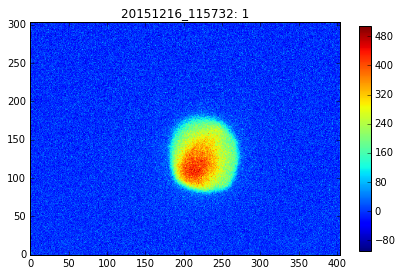

In [7]:
colors = 'jet' # e.g., 'jet', gnuplot2, or 'bone'
# plot setup
fig, ax = plt.subplots()
image = ax.imshow(bksub, cmap=colors)
cb = plt.colorbar(image, shrink=0.85)
# format
plt.xlim(0, bksub.shape[1])
plt.ylim(0, bksub.shape[0])
plt.tight_layout()
plt.title(rid + ': ' + str(squid))
fileout = os.path.join(out_dire, str(squid) + "_img.png")
plt.savefig(fileout, dpi=300)
plt.show()

List of colormaps available here http://matplotlib.org/examples/color/colormaps_reference.html